In [1]:
# JesseRuiz_nlp_project_Codeup_2019

In [83]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

random_state=123
import random

In [3]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [4]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

In [5]:
# Function shows a list of labels (Programming Language) of a repository. 
# The function takes a BeautifulSoup ResultSet and returns a list.
def get_labels(bs4resultset):
    labels = []
    for div in bs4resultset:
        repo_list = re.findall(r'.+', div.text.lower())
        lang = list(set(repo_list) & set(langs))
        if lang != []:
            labels.append(lang[0])
        else:
            labels.append('na')
    return labels


In [6]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*\s/\s.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

## Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [6]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

In [7]:
headers = {'User-Agent': 'student'} # codeup.com doesn't like our default user-agent
response = get(base_url)

In [8]:
print(response.text[:400])



<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https:/


In [152]:
pprint(response.text)

('\n'
 '\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '  <head>\n'
 '    <meta charset="utf-8">\n'
 '  <link rel="dns-prefetch" href="https://github.githubassets.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n'
 '  <link rel="dns-prefetch" '
 'href="https://user-images.githubusercontent.com/">\n'
 '\n'
 '\n'
 '\n'
 '  <link crossorigin="anonymous" media="all" '
 'integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" '
 'rel="stylesheet" '
 'href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" '
 '/>\n'
 '  <link crossorigin="anonymous" media="

 '\n'
 '                <a class="topic-tag topic-tag-link f6 my-1" '
 'href="/topics/java" title="Topic: java" data-ga-click="Topic, search '
 'results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:java,repository_id:114087866,repository_nwo:iliubang/vimrc,repository_public:true,repository_is_fork:false">\n'
 '        java\n'
 '</a>\n'
 '\n'
 '                <a class="topic-tag topic-tag-link f6 my-1" '
 'href="/topics/bash" title="Topic: bash" data-ga-click="Topic, search '
 'results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:bash,repository_id:114087866,repository_nwo:iliubang/vimrc,repository_public:true,repository_is_fork:false">\n'
 '        bash\n'
 '</a>\n'
 '\n'
 '                <a class="topic-tag topic-tag-link f6 my-1" '
 'href="/topics/golang" title="Topic: golang" data-ga-click="Topic, search '
 'results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:golang,repository_id:114087866,repository_nwo:iliubang/vimrc,reposit

### Create a BeautifulSoup object

In [153]:
soup = BeautifulSoup(response.content, 'html.parser')


In [154]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-4540bebef0c6bac62c2b8b073beec16b.css" integrity="sha512-4ohd09bNnMlKWClfY22ZwyWNN3GJm

### This looks for the repo class, which is structured differently than the TRENDING page which we used before...
### Each page contains 10 repos... 

In [155]:
# We search for all the repositories that have the following class. We should get back 25 objects.
repo2 = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
print(type(repo2))

<class 'bs4.element.ResultSet'>


In [156]:
print(len(repo2))

10


In [157]:
# Show what the repo looks like

for div in repo2:
    print(div.text)




NerdHubMC/Refined-Machinery


        A tech mod with machines and stuff for 1.14
      


        minecraft


        fabric


        mod


        snapshot


        minecraft-mod


        snapshots




          Updated May 12, 2019








Java






          2
        






bacco007/HomeAssistant-Config


        Home Assistant Config
      


        home-assistant


        home-assistant-config


        home-assistant-configuration




          Updated May 12, 2019








JavaScript






          2
        






askmench/mench-web-app



          Updated May 12, 2019








PHP






          2
        






Library-of-Kaeon/Library-of-Kaeon


        Make all that ought to be into reality.
      


          Apache-2.0 license
        

          Updated May 12, 2019








Java






          3
        






renanwolf/Unity-LowPowerMemoryConsumption


        Unity plugin to reduce device's battery drain, optimizing energy by lowering the CPU and GPU usage

### Now that we have an entirely different HTML text structure, we have to write new regex to capture the relevant information.

### This function crawls across multiple pages to scrape these pages. Aiming for 150 repos, which is 15 pages.

In [158]:
repo2

[<li class="repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source">
 <div class="col-12 col-md-8 pr-md-3">
 <h3>
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;1","result_position":1,"click_id":184135212,"result":{"id":184135212,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxODQxMzUyMTI=","model_name":"Repository","url":"https://github.com/NerdHubMC/Refined-Machinery"},"client_id":null,"originating_request_id":"C630:295D:14A73AA:2274043:5CD781A8","originating_url":"https://github.com/search?o=desc&amp;p=1&amp;q=stars%3A%3E1&amp;s=updated&amp;type=Repositories","referrer":null,"user_id":null}}' data-hydro-click-hmac="138da7aa3d6d19330464094dd720dfbe4c3adb62c39f4fda76ab588193d5b6e6" href="/NerdHubMC/Refined-Machinery">NerdHubMC/Refined-Machinery</a>
 </h3>
 <p class="col-12 col-md-9 d-inline-block text-gray mb-2 pr-4">
         A tech mod with machines and stuff for 1.14
  

In [159]:
for div in repo2:
    print(div.text)




NerdHubMC/Refined-Machinery


        A tech mod with machines and stuff for 1.14
      


        minecraft


        fabric


        mod


        snapshot


        minecraft-mod


        snapshots




          Updated May 12, 2019








Java






          2
        






bacco007/HomeAssistant-Config


        Home Assistant Config
      


        home-assistant


        home-assistant-config


        home-assistant-configuration




          Updated May 12, 2019








JavaScript






          2
        






askmench/mench-web-app



          Updated May 12, 2019








PHP






          2
        






Library-of-Kaeon/Library-of-Kaeon


        Make all that ought to be into reality.
      


          Apache-2.0 license
        

          Updated May 12, 2019








Java






          3
        






renanwolf/Unity-LowPowerMemoryConsumption


        Unity plugin to reduce device's battery drain, optimizing energy by lowering the CPU and GPU usage

In [160]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

In [161]:
repo_name_and_label(repo2)

[['NerdHubMC/Refined-Machinery', 'java'],
 ['bacco007/HomeAssistant-Config', 'javascript'],
 ['askmench/mench-web-app', 'php'],
 ['Library-of-Kaeon/Library-of-Kaeon', 'java'],
 ['renanwolf/Unity-LowPowerMemoryConsumption', 'c#'],
 ['iliubang/vimrc', 'vim script'],
 ['istio/installer', 'na'],
 ['AsciiTable/VDGA_Fall18_Project', 'c#'],
 ['j5ik2o/thread-weaver', 'scala'],
 ['sasagawa888/DeepLearning', 'elixir']]

In [162]:
# Finds the user/repo_name...
for div in repo2:
#     print(div.text)
    print(re.findall(r'.*/.*',div.text)[0])

NerdHubMC/Refined-Machinery
bacco007/HomeAssistant-Config
askmench/mench-web-app
Library-of-Kaeon/Library-of-Kaeon
renanwolf/Unity-LowPowerMemoryConsumption
iliubang/vimrc
istio/installer
AsciiTable/VDGA_Fall18_Project
j5ik2o/thread-weaver
sasagawa888/DeepLearning


In [163]:
# Finds the number of stars...
for div in repo2:
#     print(div.text)
    print(re.findall(r'(\d)', div.text))

['1', '1', '4', '1', '2', '2', '0', '1', '9', '2']
['0', '0', '7', '1', '2', '2', '0', '1', '9', '2']
['1', '2', '2', '0', '1', '9', '2']
['2', '0', '1', '2', '2', '0', '1', '9', '3']
['1', '2', '2', '0', '1', '9', '3']
['1', '2', '2', '0', '1', '9', '7']
['2', '0', '1', '2', '2', '0', '1', '9', '7', '4', '1']
['1', '8', '6', '5', '2', '0', '1', '8', '1', '2', '2', '0', '1', '9', '2']
['5', '2', '3', '1', '2', '2', '0', '1', '9', '5']
['8', '8', '8', '1', '2', '2', '0', '1', '9', '8']


### Okay, this can't be achieved with Regex... going to webscrape from the Repo site instead...

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [172]:
def get_url_list():
    '''Finds a long list of urls based on a max number of pages, which is hardcoded into the function.'''
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 100
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
          
        repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in repo:
            one = []
            one.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(one)
        time.sleep(3)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [173]:
first_url_list = get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
90
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
10

510
traversing url: https://github.com/search?o=desc&p=82&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=83&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=84&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=85&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=86&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=87&q=stars%3A%3E1&s=updated&type=Repositories/
520
traversing url: https://github.com/search?o=desc&p=88&q=stars%3A%3E1&s=updated&type=Repositories/
530
traversing url: https://github.com/search?o=desc&p=89&q=stars%3A%3E1&s=updated&type=Repositories/
540
traversing url: https://github.com/search?o=desc&p=90&q=stars%3A%3E1&s=updated&type=Repositories/
550
traversing url: https://github.com/search?o=desc&p=91&q=stars%3A%3E1&s=updated

In [174]:
first_url_list

['https://github.com/NetBSD/src',
 'https://github.com/QubesOS/build-logs',
 'https://github.com/morozov-group/magento2-similar-products',
 'https://github.com/u-simon/springCloudDemo',
 'https://github.com/AMReX-Codes/amrex',
 'https://github.com/joeynmt/joeynmt',
 'https://github.com/JingningShi/MtreeRing',
 'https://github.com/rudix-mac/rudix',
 'https://github.com/PlatoJobs/PlatoJobs.github.io',
 'https://github.com/yongzhuo/nlp_xiaojiang',
 'https://github.com/alexherbo2/site',
 'https://github.com/opengeospatial/geotiff',
 'https://github.com/dawoudt/JustWatchAPI',
 'https://github.com/ryanbr/fanboy-adblock',
 'https://github.com/apple/swift-source-compat-suite',
 'https://github.com/MaksimRudnev/LittleHelpers',
 'https://github.com/alexherbo2/configuration.chrome',
 'https://github.com/ryanelandt/PressureFieldContact.jl',
 'https://github.com/Genivia/ugrep',
 'https://github.com/gochain-io/web3',
 'https://github.com/gochain-io/web3',
 'https://github.com/NetBSD/src',
 'https://

# Function name: get_url_list()
## This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

In [175]:
first_url_list[0]

'https://github.com/NetBSD/src'

In [179]:
def get_article_text(list):
    '''Takes a list of urls and pulls the README text into a dataframe and returns the dataframe.'''
    good_blobs = []
    read_me_list = []
    
    for element in list:
        url = element + '/blob/master/README.md'
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-3 p-md-6')
#         read_me_list.append(str(blob) + ':')
        time.sleep(3)
        if read_me != None:
        
            read_me_list.append(read_me.text)
            good_blobs.append(element)
    result = pd.DataFrame(np.column_stack([good_blobs, read_me_list]), columns=['repo_name', 'readme'])
    return result

In [181]:
def get_repo_all(urls):
    '''Takes a list of urls and returns a dataframe with the repo title, the repos programming language, the original text of the 
    README file and the number of stars that the repo has. If there were multiple languages, 
    we took the language that had the highest percentage.'''
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            time.sleep(3)
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [182]:
df = get_repo_all(first_url_list)

Total number of repos scraped... 1
Total number of repos scraped... 2
Total number of repos scraped... 3
Total number of repos scraped... 4
Total number of repos scraped... 5
Total number of repos scraped... 6
Total number of repos scraped... 7
Total number of repos scraped... 8
Total number of repos scraped... 9
Total number of repos scraped... 10
Total number of repos scraped... 11
Total number of repos scraped... 12
Total number of repos scraped... 13
Total number of repos scraped... 14
Total number of repos scraped... 15
Total number of repos scraped... 16
Total number of repos scraped... 17
Total number of repos scraped... 18
Total number of repos scraped... 19
Total number of repos scraped... 20
Total number of repos scraped... 21
Total number of repos scraped... 22
Total number of repos scraped... 23
Total number of repos scraped... 24
Total number of repos scraped... 25
Total number of repos scraped... 26
Total number of repos scraped... 27
Total number of repos scraped... 28
T

Total number of repos scraped... 226
Total number of repos scraped... 227
Total number of repos scraped... 228
Total number of repos scraped... 229
Total number of repos scraped... 230
Total number of repos scraped... 231
Total number of repos scraped... 232
Total number of repos scraped... 233
Total number of repos scraped... 234
Total number of repos scraped... 235
Total number of repos scraped... 236
Total number of repos scraped... 237
Total number of repos scraped... 238
Total number of repos scraped... 239
Total number of repos scraped... 240
Total number of repos scraped... 241
Total number of repos scraped... 242
Total number of repos scraped... 243
Total number of repos scraped... 244
Total number of repos scraped... 245
Total number of repos scraped... 246
Total number of repos scraped... 247
Total number of repos scraped... 248
Total number of repos scraped... 249
Total number of repos scraped... 250
Total number of repos scraped... 251
Total number of repos scraped... 252
T

Total number of repos scraped... 448
Total number of repos scraped... 449
Total number of repos scraped... 450
Total number of repos scraped... 451
Total number of repos scraped... 452
Total number of repos scraped... 453
Total number of repos scraped... 454
Total number of repos scraped... 455
Total number of repos scraped... 456
Total number of repos scraped... 457
Total number of repos scraped... 458
Total number of repos scraped... 459
Total number of repos scraped... 460
Total number of repos scraped... 461
Total number of repos scraped... 462
Total number of repos scraped... 463
Total number of repos scraped... 464
Total number of repos scraped... 465
Total number of repos scraped... 466
Total number of repos scraped... 467
Total number of repos scraped... 468
Total number of repos scraped... 469
Total number of repos scraped... 470
Total number of repos scraped... 471
Total number of repos scraped... 472
Total number of repos scraped... 473
Total number of repos scraped... 474
T

In [183]:
df.to_csv('github_large_data.csv', index=False)

In [186]:
df.sample(30)

,title,language,original,stars
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2
400,iceiix/stevenarella,Rust,Stevenarella\n\nMulti-protocol Minecraft-compa...,92
470,swdotcom/swdc-vscode,TypeScript,\nCode Time for Visual Studio Code\n\nProgra...,51
105,dluciano/pokedex,JavaScript,\nThe project description can be founded here:...,2
45,HarryShomer/Hockey-Scraper,Python,\n\n\n\nHockey-Scraper\n\nPurpose\nThis packag...,58
171,sqlmapproject/sqlmap,Python,sqlmap\n \nsqlmap is an open source penetr...,14120
284,shopizer-ecommerce/shopizer-shop-angular,CSS,Shopizer\nDemo : https://shopizer-angular.hero...,2
333,Pttn/rieMiner,Assembly,rieMiner 0.9\nrieMiner is a Riecoin miner supp...,2
143,Pathoschild/StardewMods,C#,This repository contains my SMAPI mods for Sta...,140
249,Wadauk/scihub_ck,Perl,scihub_ck\n一个简版的Sci-hub可用域名检查工具。\nScihub_ck is...,72


# Prepare

### We have a working master notebook that saves a large dataframe with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

# First run of modeling, we acquired about 150 repos to do modeling. -> github_data.csv

# Second run through, we acquired about 522 repos. -> github_large_data.csv

In [1]:
from env import path

### Leaving the work for the first modeling phase below...

In [7]:
file = 'github_data.csv'

In [8]:
df = pd.read_csv(path+file, header='infer', index_col=0)

In [9]:
df

,title,language,original,stars
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8


In [10]:
df.shape

(155, 4)

In [11]:
gh = df.copy()

In [12]:
gh.shape

(155, 4)

## Clean

In [13]:
def original_word_count():
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [14]:
original_word_count()
df.head()

,title,language,original,stars,original_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309


In [15]:
def basic_clean():
    
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [16]:
basic_clean()

,title,language,original,stars,original_cnt,article
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...


In [17]:
def article_word_count():
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [18]:
article_word_count()

,title,language,original,stars,original_cnt,article,article_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075


In [19]:
def lemmatize():
    
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [20]:
lemmatize()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...


In [21]:
def lemm_word_count():
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [22]:
lemm_word_count()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...,298
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...,315
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...,3075


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [23]:
df['article'].iloc[0]


'college hub web based accommodation service build setup install dependencies npm install serve with hot reload at localhost 3000 npm run dev build for production and launch server npm run build npm start generate static project npm run generate for detailed explanation on how things work checkout nuxt js docs'

In [24]:
df['lemmatized'].iloc[0]

# df.loc[df['A'] == 'foo']

'college hub web based accommodation service build setup install dependency npm install serve with hot reload at localhost 3000 npm run dev build for production and launch server npm run build npm start generate static project npm run generate for detailed explanation on how thing work checkout nuxt j doc'

## Explore the data that you have scraped. Here are some ideas for exploration:

* What are the most common words in READMEs?
* What does the distribution of IDFs look like for the most common words?
* Does the length of the README vary by language?
* Do different languages use a different number of unique words?

In [25]:
df.dtypes

title           object
language        object
original        object
stars            int64
original_cnt     int64
article         object
article_cnt      int64
lemmatized      object
lemm_cnt         int64
dtype: object

In [26]:
df.language.value_counts()

JavaScript          24
Python              23
TypeScript          14
PowerShell          13
HTML                 9
Java                 8
None                 8
C++                  7
C#                   6
Shell                5
Ruby                 4
C                    4
R                    4
CSS                  4
F#                   3
Vue                  3
Perl 6               3
Apex                 2
Smalltalk            2
Kotlin               2
Swift                2
OCaml                1
Go                   1
Fortran              1
Jupyter Notebook     1
Objective-C          1
Name: language, dtype: int64

### Make sure the language column is lower cased

In [27]:
df['language'] = df['language'].str.lower()

In [28]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189


In [29]:
def remove_stopwords(extra_words=None, exclude_words=None):
    df = lemmatize()
    stopwords = nltk.corpus.stopwords.words('english')

    
    if extra_words != None:
        stopwords = stopwords + extra_words
    if exclude_words != None:
        stopwords = [word for word in stopwords if word not in exclude_words]
        
    
    df[['clean']] = df[['lemmatized']]
    df[['word_cnt_after_stop']] = df[['title']]

    art_nums = list(range(df.clean.count()))
    for art_num in art_nums:
        words = df.clean[art_num].split()
        without_stopwords = [word for word in words if word not in stopwords]
        df.word_cnt_after_stop[art_num] = len(without_stopwords)
        without_stopwords_join = ' '.join(without_stopwords)
        df.clean[art_num] = without_stopwords_join
    df[['per_stopwords_kept']] = df[['title']]
    df[['per_stopwords_kept']] = df.word_cnt_after_stop / df.lemm_cnt
    df[['per_stopwords_kept']] = df[['per_stopwords_kept']].astype(float)
    
    df[['per_overall_kept']] = df[['title']]
    df[['per_overall_kept']] = df.word_cnt_after_stop / df.original_cnt
    df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
   
    return df

In [30]:
# DO NOT RE-RUN THIS FUNCTION AFTER THE FIRST TIME RAN!
remove_stopwords(extra_words=langs)

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,43,0.860000,0.781818
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343
5,bajumar/Azure-Monitor-Logs,none,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96,azure monitor log repo repo contains everythin...,50,0.520833,0.510204
6,gigantum/gigantum-testing,python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208,gigantum testing automation gigantum testing s...,153,0.735577,0.701835
7,dequelabs/cauldron-react,javascript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...,298,cauldron react project used internally deque s...,192,0.644295,0.646465
8,c-koi/gmic-qt,c++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt versatile g mic plugin purpose g mic ...,257,0.815873,1.032129
9,GeneZharov/introversion,javascript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...,3075,introversion j tool debugging expression work ...,2084,0.677724,0.652882


### Drop repos that have a low wordcount in the Readme file

In [31]:
df = df[df.original_cnt > 10]

In [32]:
df.shape

(148, 13)

In [33]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,43,0.860000,0.781818
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343


In [34]:
top_langs = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>5])
top_langs

,language
javascript,24
python,23
typescript,14
powershell,13
none,8
java,8
c++,6
c#,6


In [35]:
top_langs_list = list(top_langs.index)
top_langs_list

['javascript',
 'python',
 'typescript',
 'powershell',
 'none',
 'java',
 'c++',
 'c#']

In [36]:
top_gh = df[df['language'].isin(top_langs_list)]

In [37]:
top_gh.shape

(102, 13)

In [38]:
top_gh

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343
5,bajumar/Azure-Monitor-Logs,none,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96,azure monitor log repo repo contains everythin...,50,0.520833,0.510204
6,gigantum/gigantum-testing,python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208,gigantum testing automation gigantum testing s...,153,0.735577,0.701835
7,dequelabs/cauldron-react,javascript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...,298,cauldron react project used internally deque s...,192,0.644295,0.646465
8,c-koi/gmic-qt,c++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt versatile g mic plugin purpose g mic ...,257,0.815873,1.032129
9,GeneZharov/introversion,javascript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...,3075,introversion j tool debugging expression work ...,2084,0.677724,0.652882
10,dem-net/DEM.Net,c#,\nDEM.Net\nDigital Elevation Model library in ...,27,321,dem net digital elevation model library in c e...,412,dem net digital elevation model library in c e...,412,dem net digital elevation model library elevat...,325,0.788835,1.012461


### Now we have a dataframe, top_gh, which has 102 entries. These are the repos that have most occuring languages.

## Visualize

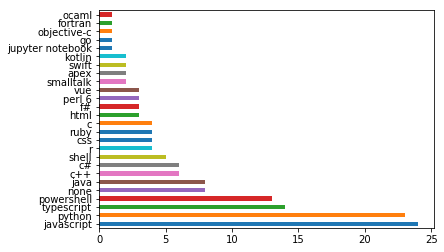

In [39]:
df.language.value_counts().plot.barh()

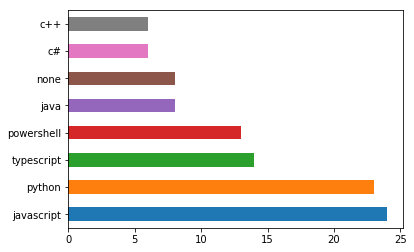

In [40]:
top_gh.language.value_counts().plot.barh()

### Explore the repos readme's that are PYTHON language...

In [41]:
py = top_gh[top_gh.language == 'python']
py.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
6,gigantum/gigantum-testing,python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208,gigantum testing automation gigantum testing s...,153,0.735577,0.701835
11,damng/hackernews-rss-with-inlined-content,python,hackernews-rss-inlined-content\nLoads the hack...,10,176,hackernews rss inlined content loads the hacke...,202,hackernews r inlined content load the hackerne...,202,hackernews inlined content load hackerness inl...,112,0.554455,0.636364
16,bazelbuild/rules_jvm_external,python,rules_jvm_external\nTransitive Maven artifact ...,46,1077,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,839,0.729565,0.779016
19,bazelbuild/rules_jvm_external,python,rules_jvm_external\nTransitive Maven artifact ...,46,1077,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,839,0.729565,0.779016
23,sphinx-gallery/sphinx-gallery,python,Sphinx-Gallery\n\n\nA Sphinx extension that bu...,147,178,sphinx gallery a sphinx extension that builds ...,193,sphinx gallery a sphinx extension that build a...,193,sphinx gallery sphinx extension build version ...,135,0.699482,0.758427


In [42]:
py_words = ' '.join(py.article)

In [43]:
py_words

'gigantum testing automation of gigantum testing with selenium installation first create and activate a python virtual environment for this project python3 m venv testenv source testenv bin activate pip3 install r requirements txt next install the binary browser drivers so that you can programmatically interact with the browser web driver for chrome chromium brew install chromedriver web driver for firefox brew install geckodriver starting gigantum client under_test before running the harness ensure the gigantum client is installed and running testing the stable build pip3 install gigantum gigantum install gigantum start testing the edge build pip3 install gigantum gigantum install e gigantum start e usage to run all tests using regular chrome driver note this may take a while put a valid username and password into the untracked credentials txt echo e my_username nmy_password credentials txt now run the driver python3 driver py to run only example tests in headless mode python3 driver 

(-0.5, 399.5, 199.5, -0.5)

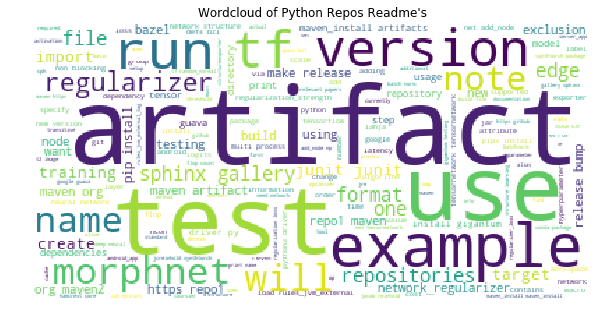

In [44]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.figure(figsize=(10,10))
plt.imshow(img)

plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

### This shows us artifact, test and use are used a lot in Python Repo Readme files.

In [45]:
all_words = ' '.join(df.article)
all_freq = pd.Series(all_words).value_counts()


### Compare the Python words with the All words collection in a Wordcloud

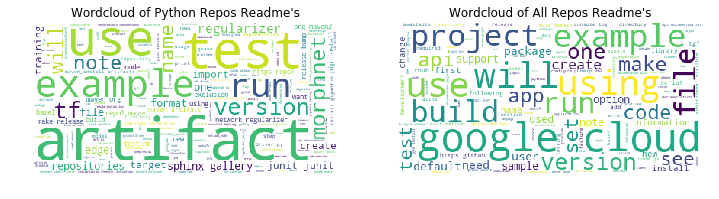

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
img = WordCloud(background_color='white').generate(py_words)
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

plt.subplot(1, 2, 2)
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)
plt.title('Wordcloud of All Repos Readme\'s')
plt.axis('off')

# fig.tight_layout(pad=2)

plt.box(False)

# Models!

## Logistic Regression

In [47]:
top_gh.language.value_counts(normalize=True)

javascript    0.235294
python        0.225490
typescript    0.137255
powershell    0.127451
java          0.078431
none          0.078431
c#            0.058824
c++           0.058824
Name: language, dtype: float64

In [48]:
top_gh.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343
5,bajumar/Azure-Monitor-Logs,none,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96,azure monitor log repo repo contains everythin...,50,0.520833,0.510204


In [49]:
top_gh.clean.values

array(['bounce bounce bounce 2 ultimate remaster wish game created miika vuorio danila karpov eetu petanen wa created honour original bounce made nokia phone early 2000s',
       'super preloader document complete document difference verions super_preloaderplus_one_new_legacy user j old version work gm4 use promise super_preloaderplus_one_new user j stable version synced greasefork using old syntax super_preloaderplus_one_es8 user j version active development introduction gm script auto loading paginated web page join page together based rule script forked http greasyfork org en script 10433 super preloaderplus one thanks original author swdyh ywzhaiqi nlf swdyh still actively improving rule developping extension version autopagerize userscript exists someone need maintain rule chinese english user since swdyh rule mainly japanese website afraid fact feedback chinese would like add rule english user could feel free leave feedback please leave feedback greasefork page development guide 

In [50]:
top_gh.language.values

array(['javascript', 'javascript', 'powershell', 'javascript', 'none',
       'python', 'javascript', 'c++', 'javascript', 'c#', 'python',
       'powershell', 'python', 'typescript', 'python', 'typescript',
       'java', 'python', 'typescript', 'none', 'typescript', 'java',
       'python', 'typescript', 'none', 'powershell', 'python', 'none',
       'powershell', 'python', 'java', 'java', 'powershell', 'powershell',
       'python', 'java', 'java', 'powershell', 'python', 'python', 'java',
       'java', 'powershell', 'python', 'c++', 'powershell', 'python',
       'c++', 'c#', 'c#', 'javascript', 'typescript', 'c#', 'javascript',
       'javascript', 'javascript', 'javascript', 'javascript',
       'javascript', 'javascript', 'powershell', 'javascript', 'none',
       'python', 'javascript', 'none', 'python', 'javascript', 'c++',
       'javascript', 'typescript', 'typescript', 'javascript',
       'typescript', 'typescript', 'none', 'c++', 'c#', 'none', 'c#',
       'powershell', 

In [51]:
docs = dict(zip(top_gh.language.values, top_gh.clean.values))

In [52]:
docs

{'javascript': 'botfront open source gui platform build chatbots rasa get started getting started quick tutorial get started minute getting help read documentation get answer spectrum community license botfront agplv3 licensed',
 'powershell': 'net net net api net compiler platform sdk 3 net net xamarinmono unity net foundation code conduct net foundation',
 'none': 'knowledge wiki personal wiki share everything know world form online gitbook first time visiting wiki take look describes wiki structure goal lot detail using wiki well quickly search content wiki explore tree view left access entry wiki super fast using alfred mind workflow aside wiki also explore learn anything thing learn thing wrote shared share knowledge longer form writing article making youtube video also love writing code solves various problem share github find thing made shared thus far make wiki view similar continuously updated wikis afraid create one share know world contributing found mistake anywhere wiki wo

In [53]:
docs.values()

dict_values(['botfront open source gui platform build chatbots rasa get started getting started quick tutorial get started minute getting help read documentation get answer spectrum community license botfront agplv3 licensed', 'net net net api net compiler platform sdk 3 net net xamarinmono unity net foundation code conduct net foundation', 'knowledge wiki personal wiki share everything know world form online gitbook first time visiting wiki take look describes wiki structure goal lot detail using wiki well quickly search content wiki explore tree view left access entry wiki super fast using alfred mind workflow aside wiki also explore learn anything thing learn thing wrote shared share knowledge longer form writing article making youtube video also love writing code solves various problem share github find thing made shared thus far make wiki view similar continuously updated wikis afraid create one share know world contributing found mistake anywhere wiki would appreciate help quickl

In [54]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(docs.values())
tfidfs

<8x925 sparse matrix of type '<class 'numpy.float64'>'
	with 1133 stored elements in Compressed Sparse Row format>

In [55]:
sm = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
sm

,015,05046,0741927,07s,0847295,10,100,1047696,1137,1145,...,wrote,www,xamarinmono,xml,yanai,yokoi,youtube,yukina,yvonne,zip
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.13612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061821,0.000000,0.00000,0.000000,0.000000,0.000000,0.061821,0.000000,0.000000,0.000000
3,0.023215,0.000000,0.000000,0.023215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023215
4,0.000000,0.018804,0.018804,0.000000,0.018804,0.094022,0.037609,0.018804,0.018804,0.018804,...,0.000000,0.000000,0.00000,0.000000,0.018804,0.018804,0.000000,0.018804,0.018804,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.082632,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.039004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = tfidf.fit_transform(top_gh.clean)
y = top_gh.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=random_state)
# not sure if we need to stratify y... so not doing it here... I think this is unneccessary because we dont have unbalanced set.
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [57]:
X_train

<81x3662 sparse matrix of type '<class 'numpy.float64'>'
	with 11036 stored elements in Compressed Sparse Row format>

In [58]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 90.12%
---
Confusion Matrix
actual      c#  c++  java  javascript  none  powershell  python  typescript
predicted                                                                  
c#           2    0     0           0     0           0       0           0
c++          0    2     0           0     0           0       0           0
java         0    0     6           0     0           0       0           0
javascript   2    3     0          19     0           0       0           0
none         0    0     0           0     5           0       0           0
powershell   0    0     0           0     0          10       0           0
python       1    0     1           0     1           0      18           0
typescript   0    0     0           0     0           0       0          11
---
              precision    recall  f1-score   support

          c#       1.00      0.40      0.57         5
         c++       1.00      0.40      0.57         5
        java       1.00      0.86  

In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 80.95%
---
Confusion Matrix
actual      c#  c++  java  javascript  none  powershell  python  typescript
predicted                                                                  
javascript   1    1     0           5     0           0       0           0
none         0    0     0           0     1           0       0           0
powershell   0    0     0           0     0           3       0           0
python       0    0     1           0     1           0       5           0
typescript   0    0     0           0     0           0       0           3
---
              precision    recall  f1-score   support

          c#       0.00      0.00      0.00         1
         c++       0.00      0.00      0.00         1
        java       0.00      0.00      0.00         1
  javascript       0.71      1.00      0.83         5
        none       1.00      0.50      0.67         2
  powershell       1.00      1.00      1.00         3
      python       0.71      1.00      0.83    

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
page_range = random.choice(range(101))
page_range

28

## Get some new random data

In [61]:
# this function will give a list of urls from a RANDOM page on GitHub.
def get_random_urls_list():
    '''Generates a list of 10 urls from a random page on GitHubs Most Recently Updated repos'''
    pg = random.choice(range(101))
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p='+ str(pg) + '&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
    for div in repo:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        urls.append(one)
#     print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
    return final_urls

In [62]:
def clean(text):
    '''A simple function to cleanup text data'''
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [63]:
# Depends upon get_random_urls_list() function
def rand_url():
    '''Finds a random item from a list of urls. That list of urls is generated by another function, get_random_url_list()'''
    return random.choice(get_random_urls_list())

In [64]:
random_url = rand_url()
random_url

'https://github.com/wtanaka/ansible-role-gcloud-sdk'

In [65]:
# This function depends on random_url() function, which finds a random url.
def new_rand_readme():
    '''Finds the readme file from the randomly generated url on GitHubs Most Recently Updated repos'''
    headers = {'User-Agent': 'Student'}
    response = get(random_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    read_me = soup.find(class_='markdown-body entry-content p-5')
    read_me.text
    test_text = ' '.join(clean(read_me.text))
    return test_text

In [66]:
new_rand_readme()

'wtanakagcloudsdk ansible role install google cloud sdk example playbook host role role wtanakagcloud_sdk variable full set configuration option available visible defaultsmainyml gcloud_sdk_additional_package_names default list package name string additionally install available example googlecloudsdkappenginepython googlecloudsdkappenginejava googlecloudsdkdatastoreemulator googlecloudsdkpubsubemulator googlecloudsdkbigtableemulator kubectl license gplv2 author information httpwtanakacom'

## Predict

In [67]:
def predict(unknown_text):
    return lm.predict(tfidf.transform([unknown_text]))[0]

In [68]:
print('Predicted the following language, ', predict(new_rand_readme()),',', 'for the following README.md file:', new_rand_readme())

Predicted the following language,  javascript , for the following README.md file: wtanakagcloudsdk ansible role install google cloud sdk example playbook host role role wtanakagcloud_sdk variable full set configuration option available visible defaultsmainyml gcloud_sdk_additional_package_names default list package name string additionally install available example googlecloudsdkappenginepython googlecloudsdkappenginejava googlecloudsdkdatastoreemulator googlecloudsdkpubsubemulator googlecloudsdkbigtableemulator kubectl license gplv2 author information httpwtanakacom


In [81]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,43,0.860000,0.781818
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343


In [86]:
encoder = LabelEncoder()
encoder.fit(top_gh.language)
top_gh[['lang_encoded']] = top_gh[['language']]
top_gh.lang_encoded = encoder.transform(top_gh.lang_encoded)
top_gh.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,25,0.625000,0.595238,3
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,243,0.616751,0.653226,3
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667,5
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343,3
5,bajumar/Azure-Monitor-Logs,none,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96,azure monitor log repo repo contains everythin...,50,0.520833,0.510204,4


# Using t-SNE to make Visualization
### Use the TFIDFs from this logistic regression model.

In [105]:
vectors = TfidfVectorizer().fit_transform(top_gh.clean)
vectors

<102x3662 sparse matrix of type '<class 'numpy.float64'>'
	with 14211 stored elements in Compressed Sparse Row format>

In [106]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [107]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 101 nearest neighbors...
[t-SNE] Indexed 102 samples in 0.000s...
[t-SNE] Computed neighbors for 102 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 102 / 102
[t-SNE] Mean sigma: 0.483290
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 54.0483093, gradient norm = 0.5097514 (50 iterations in 0.055s)
[t-SNE] Iteration 100: error = 54.4270058, gradient norm = 0.4990895 (50 iterations in 0.042s)
[t-SNE] Iteration 150: error = 55.7269135, gradient norm = 0.5063609 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 54.4992714, gradient norm = 0.4485385 (50 iterations in 0.038s)
[t-SNE] Iteration 250: error = 55.9093170, gradient norm = 0.4821281 (50 iterations in 0.034s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.909317
[t-SNE] Iteration 300: error = 0.7274898, gradient norm = 0.0171601 (50 iterations in 0.030s)
[t-SNE] Iteration 350: error = 0.4564739, gradient norm = 0.0160253 

In [108]:
X_embedded[:, 0]

array([ -1.9217273 ,   2.2772198 , -10.608786  ,  -4.1627955 ,
         5.360756  ,   1.379703  ,  -3.7980344 ,  -2.8823178 ,
        -0.1091454 ,  -5.2291    ,   1.9421207 , -11.567498  ,
        -0.32999462,  -0.10570335,  -0.33034766,  -0.10571726,
        -7.9166403 ,  -8.145027  ,  -0.03242958, -11.239113  ,
        -0.10570344,  -7.916572  ,  -8.145611  ,  -0.03189395,
       -11.355009  ,  -9.077242  ,  -5.6994987 , -11.550293  ,
        -9.13271   ,  -5.367325  ,  -8.202201  ,   2.2346637 ,
        -7.2267184 ,  -9.251501  ,  -5.0809207 ,  -8.216646  ,
         2.1938143 ,  -7.918027  , -10.611458  ,  -5.4511104 ,
        -8.200425  ,   2.3902423 ,  -6.6834283 , -10.497072  ,
         3.0419374 ,  -7.429033  , -10.483893  ,   3.0418859 ,
        -1.5507561 ,  -1.3778249 ,  -1.6844602 ,   1.5773991 ,
        -2.8173213 ,  -3.706375  ,  -5.834629  ,  -5.834399  ,
        -2.156906  ,   2.277206  ,  -2.062391  ,   2.2772129 ,
       -10.608354  ,  -4.1627955 ,   5.446817  ,   1.51

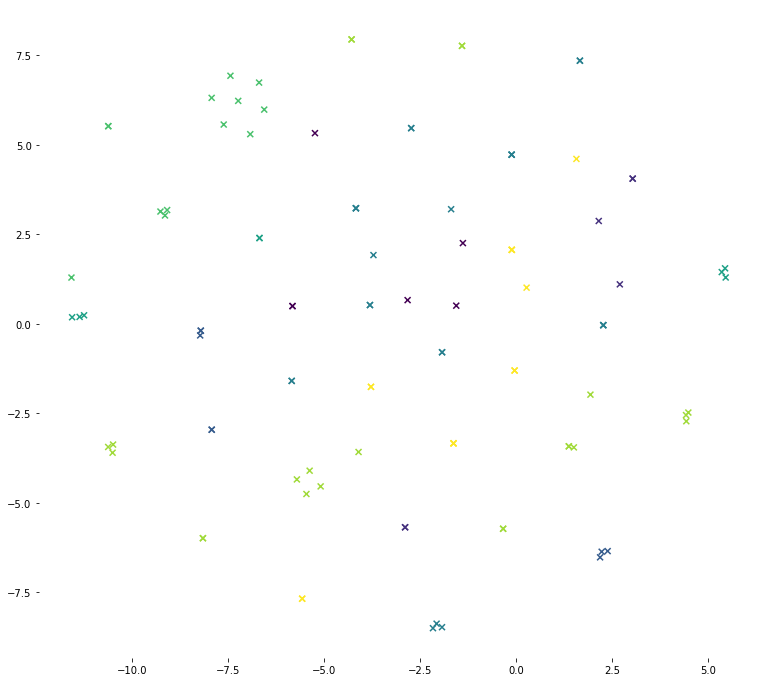

In [109]:
import matplotlib
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
# setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=top_gh.lang_encoded.values, marker="x")

# Perform a train/test split in order to work with some other models...

# Split Train/Test

In [77]:
top_gh.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce bounce 2 ultimate remaster wish ...,26,0.650000,0.619048
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394,super preloader document complete document dif...,245,0.621827,0.658602
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159,openlocfilehash sourcegitcommit translationtyp...,148,0.930818,0.986667
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189,pushqqlove weather remind time others dev npm ...,175,0.925926,0.566343
5,bajumar/Azure-Monitor-Logs,none,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96,azure monitor log repo repo contains everythin...,50,0.520833,0.510204


In [78]:
df = top_gh[['clean','language']]

In [79]:
X = df.clean
y = df.language
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes Model

In [85]:
# Define what the languages are... Since we are only using the top occuring languages, this list will be smaller than the first language list.

my_tags = list(df.language.unique())
my_tags

['javascript',
 'powershell',
 'none',
 'python',
 'c++',
 'c#',
 'typescript',
 'java']

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 6 µs, sys: 7 µs, total: 13 µs
Wall time: 28.1 µs
accuracy 0.6129032258064516
              precision    recall  f1-score   support

  javascript       0.00      0.00      0.00         2
  powershell       0.00      0.00      0.00         4
        none       1.00      0.33      0.50         3
      python       0.25      1.00      0.40         4
         c++       0.00      0.00      0.00         2
          c#       1.00      1.00      1.00         4
  typescript       1.00      0.78      0.88         9
        java       1.00      1.00      1.00         3

   micro avg       0.61      0.61      0.61        31
   macro avg       0.53      0.51      0.47        31
weighted avg       0.65      0.61      0.58        31



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes performs poorly at 61.29% accuracy. We want to optimize for accuracy so let's build more models.

# Linear Support Vector Machine

In [88]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
accuracy 0.8709677419354839
              precision    recall  f1-score   support

  javascript       1.00      0.50      0.67         2
  powershell       1.00      0.25      0.40         4
        none       1.00      1.00      1.00         3
      python       0.80      1.00      0.89         4
         c++       1.00      1.00      1.00         2
          c#       1.00      1.00      1.00         4
  typescript       1.00      1.00      1.00         9
        java       0.50      1.00      0.67         3

   micro avg       0.87      0.87      0.87        31
   macro avg       0.91      0.84      0.83        31
weighted avg       0.93      0.87      0.85        31



## Linear SVM performs much better at 87.09% accuracy.

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
accuracy 0.8387096774193549
              precision    recall  f1-score   support

  javascript       1.00      0.50      0.67         2
  powershell       1.00      0.25      0.40         4
        none       1.00      1.00      1.00         3
      python       0.67      1.00      0.80         4
         c++       1.00      1.00      1.00         2
          c#       1.00      1.00      1.00         4
  typescript       1.00      0.89      0.94         9
        java       0.50      1.00      0.67         3

   micro avg       0.84      0.84      0.84        31
   macro avg       0.90      0.83      0.81        31
weighted avg       0.91      0.84      0.83        31



## This Logistic Regression model performs slightly worse than the first one.

In [91]:
import gensim

# Word2vec and Logistic Regression


In [92]:
print(gensim.__version__)

3.7.3


### Use gensim to load a word2vec model pretrained on google news and perform some simple actions with the word vectors.

In [94]:
from gensim.models import Word2Vec
path = '~/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/'
file = "GoogleNews-vectors-negative300.bin.gz"
wv = gensim.models.KeyedVectors.load_word2vec_format(path+file, binary=True)
wv.init_sims(replace=True)

###  Normalize the word2vec vectors first, so they all have equal length. 

### Load up a Google News model. 

In [95]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

### Define some functions to perform Bag of Words analysis on the word vectors. Simple stuff like word averaging, summation, and weighted addition.

In [96]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [97]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

### Tokenize the text, Train/Test split...

In [100]:
df.head()

,clean,language
1,bounce bounce bounce 2 ultimate remaster wish ...,javascript
2,super preloader document complete document dif...,javascript
3,openlocfilehash sourcegitcommit translationtyp...,powershell
4,pushqqlove weather remind time others dev npm ...,javascript
5,azure monitor log repo repo contains everythin...,none


In [101]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['language'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.language))
print(classification_report(test.language, y_pred,target_names=my_tags))

accuracy 0.7741935483870968
              precision    recall  f1-score   support

  javascript       1.00      0.50      0.67         2
  powershell       1.00      0.25      0.40         4
        none       0.75      1.00      0.86         3
      python       0.43      0.75      0.55         4
         c++       1.00      1.00      1.00         2
          c#       1.00      1.00      1.00         4
  typescript       1.00      0.78      0.88         9
        java       0.60      1.00      0.75         3

   micro avg       0.77      0.77      0.77        31
   macro avg       0.85      0.78      0.76        31
weighted avg       0.86      0.77      0.77        31



## The Word2vec and Logistic Regression model performs at 77.42% accuracy.

# BOW with Keras


In [103]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.models import Sequential

import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [104]:
print(keras.__version__)

2.2.4


In [105]:
df.head()

,clean,language
1,bounce bounce bounce 2 ultimate remaster wish ...,javascript
2,super preloader document complete document dif...,javascript
3,openlocfilehash sourcegitcommit translationtyp...,powershell
4,pushqqlove weather remind time others dev npm ...,javascript
5,azure monitor log repo repo contains everythin...,none


In [106]:
df.shape

(102, 2)

### Split Train/Test... 

### Tokenize and then turn texts to matrix.

In [124]:
train_size = int(len(df) * .7)
train_text = df['clean'][:train_size]
train_label = df['language'][:train_size]

test_text = df['clean'][train_size:]
test_label = df['language'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_text) # only fit on train

x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)


In [125]:
print(train_size)
print(train_text)
print(train_label)
print(test_text)
print(test_label)

print(type(tokenize))

print(x_train)
print(len(x_train))
print(x_test)
print(len(x_test))

71
1      bounce bounce bounce 2 ultimate remaster wish ...
2      super preloader document complete document dif...
3      openlocfilehash sourcegitcommit translationtyp...
4      pushqqlove weather remind time others dev npm ...
5      azure monitor log repo repo contains everythin...
6      gigantum testing automation gigantum testing s...
7      cauldron react project used internally deque s...
8      g mic qt versatile g mic plugin purpose g mic ...
9      introversion j tool debugging javascript expre...
10     dem net digital elevation model library c elev...
11     hackernews r inlined content load hackerness r...
13     documentation de net ce referentiel contient l...
16     rules_jvm_external transitive maven artifact r...
18     google apis node j client node j client librar...
19     rules_jvm_external transitive maven artifact r...
21     google apis node j client node j client librar...
22     graalvm graalvm universal virtual machine runn...
23     sphinx gallery sphinx

In [126]:
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)

In [127]:
print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))

[3 3 5 3 4 6 3 1 3 0 6 5 6 7 6 7 2 6 7 4 7 2 6 7 4 5 6 4 5 6 2 2 5 5 6 2 2
 5 6 6 2 2 5 6 1 5 6 1 0 0 3 7 0 3 3 3 3 3 3 3 5 3 4 6 3 4 6 3 1 3 7]
71
[7 3 7 7 4 1 0 4 0 5 7 6 3 6 3 5 3 7 6 5 3 7 6 6 3 7 6 6 3 6 1]
31


In [128]:
y_test

array([7, 3, 7, 7, 4, 1, 0, 4, 0, 5, 7, 6, 3, 6, 3, 5, 3, 7, 6, 5, 3, 7,
       6, 6, 3, 7, 6, 6, 3, 6, 1])

In [129]:
np.max(y_train)

7

In [130]:
y_train.shape

(71,)

In [131]:
num_classes = int(np.max(y_train)) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [132]:
y_train.shape

(71, 8)

In [133]:


batch_size = 32
epochs = 2

# Build the model
model = Sequential()
# print(type(model))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 63 samples, validate on 8 samples
Epoch 1/2
63/63 [==============================] - 0s 7ms/step - loss: 2.0738 - acc: 0.2063 - val_loss: 1.5722 - val_acc: 0.5000
Epoch 2/2
63/63 [==============================] - 0s 344us/step - loss: 1.3100 - acc: 0.7460 - val_loss: 1.1795 - val_acc: 0.8750


## Achieved accuracy of 75.6% in 2 epochs

In [134]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31/31 [==============================] - 0s 78us/step
Test score: 1.963097333908081
Test accuracy: 0.19354838132858276


## Achieved accuracy of 19.35% on the Test dataset.

## Poor performance is probably due to small sample size.